In [38]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline  

## Test data

In [32]:
import numpy
import math

# create a file with random values
fo = open('tmpfile.txt','w')

for i in range(0,100):
    a = math.sin(10*numpy.random.rand())
    b = math.cos(10*numpy.random.rand())
    c = 10*numpy.random.rand()

    s = str(a) +' '+str(b) +' '+str(c)
    
    fo.write("%s %s %s\n" % (a, b, c))
#    fo.write('{} {} {}\n'.format(a,b,c))

fo.close()    

train_data = pd.read_csv('tmpfile.txt', header=None,sep='\s+' )
train_data.columns=['a_col','b_col','c_col']
train_data['d_col'] = [1 if x > 5 else 2 if x > 3 else 3 for x in sales.sum(axis=1)]
train_data['Target'] = [1 if x > 5 else 0 for x in sales.sum(axis=1)]

## Functions

### Categorical features

In [12]:
def plotCat(_var, _target):
    """
    input: categorical variable, target variable
    e.g. plotCat2(train_data.REGIONIndex, train_data.Target)
    
    """
    feat_vs_target = pd.crosstab(_var, _target.astype(bool))

    catFeat = train_data.groupby(_var).count().reset_index()
    catFeat.Target.plot(kind='bar',alpha=0.2)
    (feat_vs_target.div(feat_vs_target.sum(1).astype(float),axis=0)[:][1].
     plot(kind='line', color='purple',stacked=True,secondary_y=True)
     )
    plt.title(_var.name)
    plt.show()
    return;

### Float features

In [22]:
def plotFloat(_var, _target, _bin, _min, _max):
    """
    input: float variable, target variable, num bins to plot data, min value of float, max value of float
    e.g. plotFloat2(train_data.cnt_weekDaydayCallthdW, train_data.Target, 10, 0, 1000)
    
    """
    
    bin_means, bin_edges, binnumber    = stats.binned_statistic(_var ,_target,statistic='mean', bins=_bin, range = (_min,_max))
    bin_means2, bin_edges2, binnumber2 = stats.binned_statistic(_var ,_var,statistic='count', bins=_bin, range = (_min,_max))
    
    fig = plt.figure()
    
    ax = fig.add_subplot(111)
    data = pd.DataFrame({'binValues':bin_edges2[:_bin],'features':bin_means2})
    
    ax = data['features'].plot(kind='bar',alpha=0.2)
    
    ax2 = ax.twinx()
    orgBin = range(_bin)
    
    ax2.plot(bin_means,'r-')
    
    plt.xticks(orgBin,data.binValues)
    plt.title(_var.name)
    plt.show()
    
    return;

## PLOT

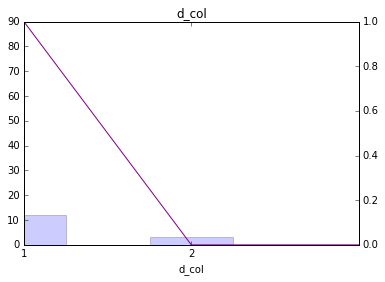

In [37]:
plotCat(train_data.d_col,train_data.Target)

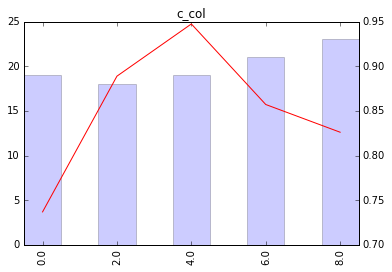

In [27]:
plotFloat(train_data.c_col,train_data.Target,5,0,10)

### Box plots

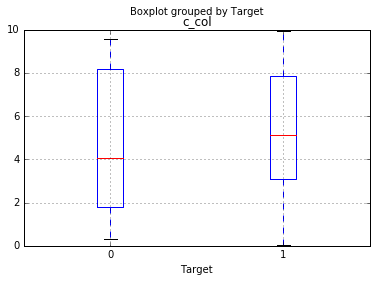

In [28]:
ax = train_data.boxplot(column='c_col',by='Target')